#### iris 데이터셋 활용 꽃잎 너비 예측 모델
- 데이터셋 : iris.csv에서 2개 Feature 사용
- 구현프레임 워크 : Pytorch

- [1] 모듈 로딩 및 데이터 준비

In [104]:
# 모듈 로딩
import torch                    # 텐서 및 수치 계산 함수 관련 모듈
import torch.nn as nn           # 인공신경망 관련 모듈
import torch.nn.functional as F    # 손실, 거리 등 함수 관련 모듈
import torch.optim as optimizer # 최적화 기법 관련 모듈

import pandas as pd             # 데이터 파일 분석 관련 모듈

In [105]:
# 랜덤 시드 고정
torch.manual_seed(1)

In [106]:
# 데이터 로딩 : CSV = > DataFrame
DATA_FILE='iris.csv'

irisDF=pd.read_csv(DATA_FILE, usecols=[2,3])
irisDF.head(2)

,petal.length,petal.width
0,1.4,0.2
1,1.4,0.2


[2] 모델 준비
- 학습방법 : 지도학습 - 회귀
- 알고리즘 : 선형관계 - 선형모델 => nn.Linear

In [107]:
# in_features : petal.length 1개
# out_features : petal.width 1개
model = nn.Linear(1, 1)

In [108]:
# 가중치와 절편 확인
for name, param in model.named_parameters():
    print(f'[{name}] {param}\n')

[weight] Parameter containing:
tensor([[0.5153]], requires_grad=True)

[bias] Parameter containing:
tensor([-0.4414], requires_grad=True)



[3] 최적화 인스턴스 준비

In [109]:
## 모델의 가중치와 절편을 최적화 ==> 인스턴스에 전달
adam_optim=optimizer.Adam(model.parameters(), lr=0.1)

[4] 학습 ==> 개발자가 구현

[4-1] 데이터셋 Tensor화 진행 : 데이터준비 시 진행 하거나 또는 학습 전 진행

In [110]:
featureTS=torch.from_numpy(irisDF[['petal.length']].values).float()
featureTS.shape

torch.Size([150, 1])

In [111]:
targetTS=torch.from_numpy(irisDF[['petal.width']].values).float()
targetTS.shape

torch.Size([150, 1])

[4-2] 학습진행  
    * 학습횟수 결정 ==> 에포크 설정  
    * 학습결과 저장 ==> 손실저장 변수 

In [112]:
EPOCH=10
loss_history=[]

In [113]:
for epoch in range(EPOCH):
    #-(1)학습진행 - forward
    pre_y=model(featureTS)
    #-(2)오차계산 - 손실함수
    loss=F.mse_loss(pre_y, targetTS)
    #-(3)최적화 - 가중치,절편 업데이트 backward
    adam_optim.zero_grad() #gradient를 0으로 초기화
    loss.backward() #  오차 미분, 비용 함수를 미분하여 gradient 계산
    adam_optim.step() #  가중치 업데이트 W와 b를 업데이트

    #-(4)학습결과 출력 및 저장
    print(f'[{epoch}/{EPOCH}] LOSS: {loss}')

[0/100] LOSS: 0.16012583673000336
[1/100] LOSS: 0.074522964656353
[2/100] LOSS: 0.13772442936897278
[3/100] LOSS: 0.07824525237083435
[4/100] LOSS: 0.04498450458049774
[5/100] LOSS: 0.07436980307102203
[6/100] LOSS: 0.09182848036289215
[7/100] LOSS: 0.06934763491153717
[8/100] LOSS: 0.04540804773569107
[9/100] LOSS: 0.04900302737951279
[10/100] LOSS: 0.066199891269207
[11/100] LOSS: 0.06832201778888702
[12/100] LOSS: 0.05394704267382622
[13/100] LOSS: 0.042835745960474014
[14/100] LOSS: 0.04668451473116875
[15/100] LOSS: 0.056329306215047836
[16/100] LOSS: 0.05706849321722984
[17/100] LOSS: 0.04860337823629379
[18/100] LOSS: 0.042276471853256226
[19/100] LOSS: 0.04480516538023949
[20/100] LOSS: 0.0506235808134079
[21/100] LOSS: 0.05096087604761124
[22/100] LOSS: 0.04575872793793678
[23/100] LOSS: 0.042143814265728
[24/100] LOSS: 0.04404692351818085
[25/100] LOSS: 0.04756830632686615
[26/100] LOSS: 0.04734067618846893
[27/100] LOSS: 0.04395326226949692
[28/100] LOSS: 0.04216213896870613

## 함수로만들기

In [114]:
# 모델 학습 함수
def training():
    loss_history=[]
    for epoch in range(EPOCH):
        #-(1)학습진행 - forward
        pre_y=model(featureTS)
        #-(2)오차계산 - 손실함수
        loss=F.mse_loss(pre_y, targetTS)
        loss_history.append(loss.item())
        
        #-(3)최적화 - 가중치,절편 업데이트 backward
        adam_optim.zero_grad() #gradient를 0으로 초기화
        loss.backward() #  오차 미분, 비용 함수를 미분하여 gradient 계산
        adam_optim.step() #  가중치 업데이트 W와 b를 업데이트

        #-(4)학습결과 출력 및 저장
        print(f'[{epoch}/{EPOCH}] LOSS: {loss}')

    return loss_history

In [115]:
loss

tensor(0.0421, grad_fn=<MseLossBackward0>)

In [116]:
# 모델 학습 진행
loss = training()

[0/100] LOSS: 0.04206747189164162
[1/100] LOSS: 0.042068514972925186
[2/100] LOSS: 0.04207003861665726
[3/100] LOSS: 0.042068298906087875
[4/100] LOSS: 0.042067475616931915
[5/100] LOSS: 0.04206898808479309
[6/100] LOSS: 0.04206881299614906
[7/100] LOSS: 0.04206743836402893
[8/100] LOSS: 0.04206797108054161
[9/100] LOSS: 0.04206867143511772
[10/100] LOSS: 0.042067751288414
[11/100] LOSS: 0.04206743836402893
[12/100] LOSS: 0.04206819459795952
[13/100] LOSS: 0.04206794872879982
[14/100] LOSS: 0.04206732660531998
[15/100] LOSS: 0.04206771031022072
[16/100] LOSS: 0.042067933827638626
[17/100] LOSS: 0.04206741601228714
[18/100] LOSS: 0.04206742346286774
[19/100] LOSS: 0.04206777736544609
[20/100] LOSS: 0.0420675203204155
[21/100] LOSS: 0.04206732288002968
[22/100] LOSS: 0.04206758737564087
[23/100] LOSS: 0.04206756502389908
[24/100] LOSS: 0.04206732288002968
[25/100] LOSS: 0.04206744581460953
[26/100] LOSS: 0.04206753894686699
[27/100] LOSS: 0.04206736013293266
[28/100] LOSS: 0.042067363858

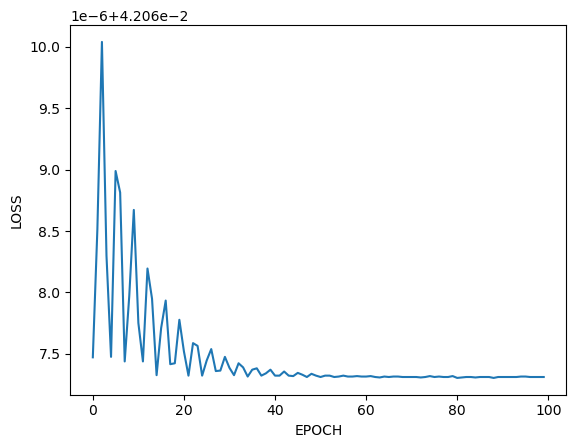

In [118]:
# 학습 후 loss 시각화
import matplotlib.pyplot as plt

plt.plot(range(10),loss)
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.show()